In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset
file_path = '/content/sample_data/DataCoSupplyChainDataset.csv'
dataset = pd.read_csv(file_path, encoding='ISO-8859-1')


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
# Check for null values in the dataset
null_values = dataset.isnull().sum()

# Display columns with null values, if any
null_values[null_values > 0]

,0
Customer Lname,8
Customer Zipcode,3
Order Zipcode,155679
Product Description,180519


In [ ]:
# Dropping the unnecessary columns. As all the information almost null in the columns 'Order Zipcode' and 'Product Description', we can drop them.
columns_to_drop = ['Order Zipcode','Product Description','Customer Id', 'Order Customer Id','Product Image']
cleaned_dataset = dataset.drop(columns=columns_to_drop)



In [ ]:
#if any row has null values, drop the row
cleaned_dataset = cleaned_dataset.dropna()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


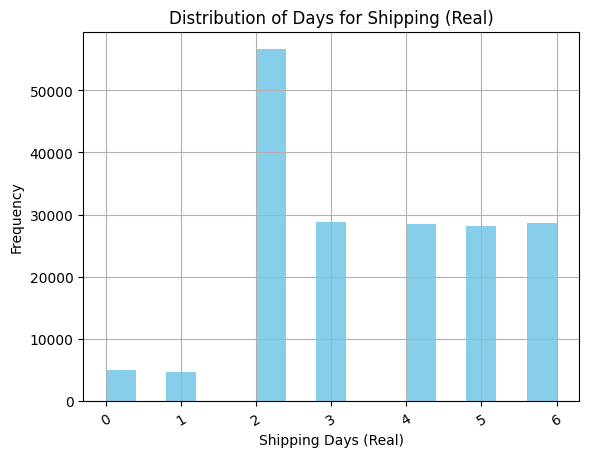

In [ ]:
# Plot 1: Distribution of 'Days for Shipping (Real)'
plt.figure()
cleaned_dataset['Days for shipping (real)'].hist(bins=15, color='skyblue')
plt.title('Distribution of Days for Shipping (Real)')
plt.xlabel('Shipping Days (Real)')
plt.ylabel('Frequency')
plt.xticks(rotation=30)
plt.show()


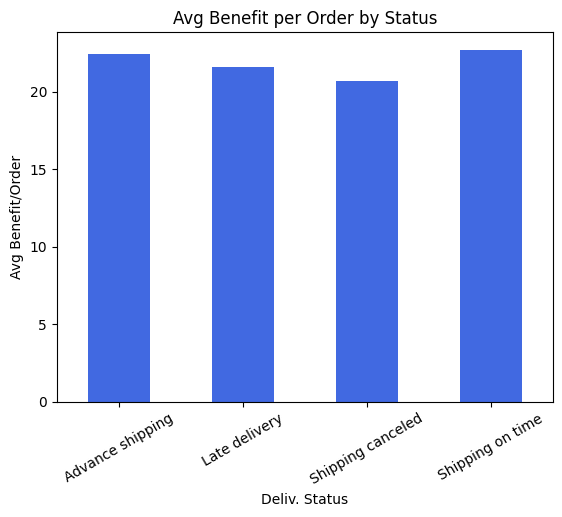

In [ ]:
# Plot 2: Average Benefit per Order by Delivery Status
plt.figure()
avg_benefit_by_status = cleaned_dataset.groupby('Delivery Status')['Benefit per order'].mean()
avg_benefit_by_status.plot(kind='bar', color='royalblue')
plt.title('Avg Benefit per Order by Status')
plt.xlabel('Deliv. Status')
plt.ylabel('Avg Benefit/Order')
plt.xticks(rotation=30)
plt.show()

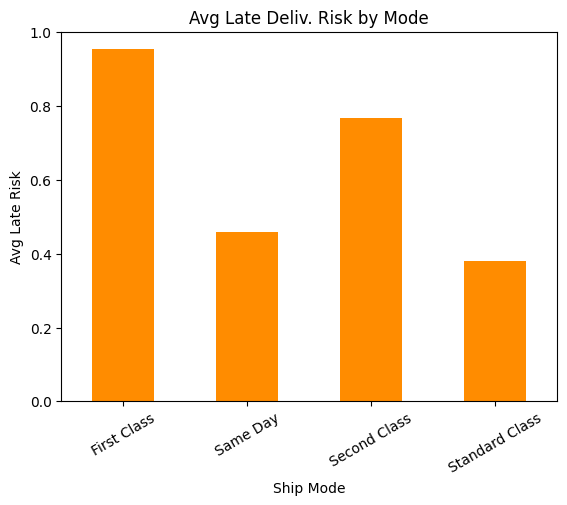

In [ ]:
# Plot 3: Average Late Delivery Risk by Shipping Mode
plt.figure()
avg_late_risk_by_mode = cleaned_dataset.groupby('Shipping Mode')['Late_delivery_risk'].mean()
avg_late_risk_by_mode.plot(kind='bar', color='darkorange')
plt.title('Avg Late Deliv. Risk by Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Avg Late Risk')
plt.xticks(rotation=30)
plt.show()


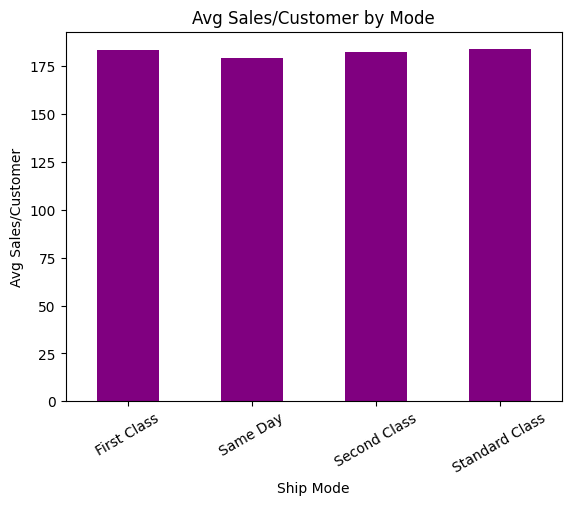

In [ ]:
# Plot 4: Sales per Customer by Shipping Mode
plt.figure()
avg_sales_by_mode = cleaned_dataset.groupby('Shipping Mode')['Sales per customer'].mean()
avg_sales_by_mode.plot(kind='bar', color='purple')
plt.title('Avg Sales/Customer by Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Avg Sales/Customer')
plt.xticks(rotation=30)
plt.show()

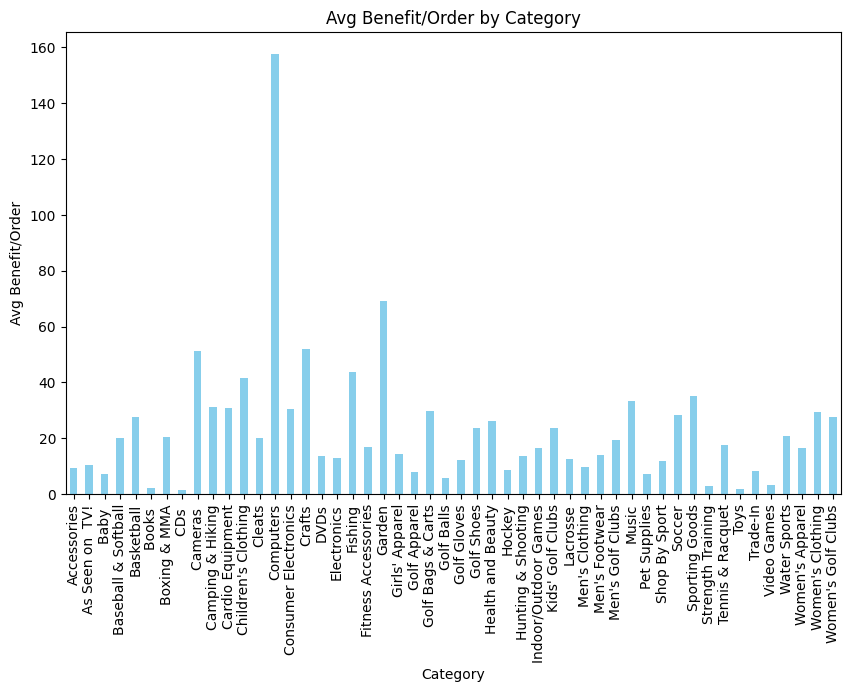

In [ ]:
# Plot 5: Benefit per Order by Category
plt.figure()
avg_benefit_by_category = cleaned_dataset.groupby('Category Name')['Benefit per order'].mean()
avg_benefit_by_category.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Avg Benefit/Order by Category')
plt.xlabel('Category')
plt.ylabel('Avg Benefit/Order')
# plt.xticks(rotation=30)
plt.show()

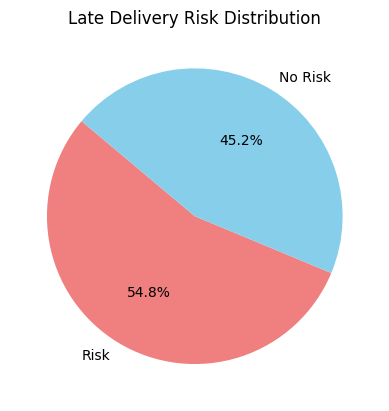

In [ ]:
# Replace 0 and 1 with descriptive labels in the 'Late_delivery_risk' column
late_delivery_risk_labels = cleaned_dataset['Late_delivery_risk'].replace({0: 'No Risk', 1: 'Risk'})

# Plotting the updated Late Delivery Risk pie chart
plt.figure()
late_delivery_risk_counts = late_delivery_risk_labels.value_counts()
late_delivery_risk_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])
plt.title('Late Delivery Risk Distribution')
plt.ylabel('')  # Remove default y-label for a cleaner look
plt.show()

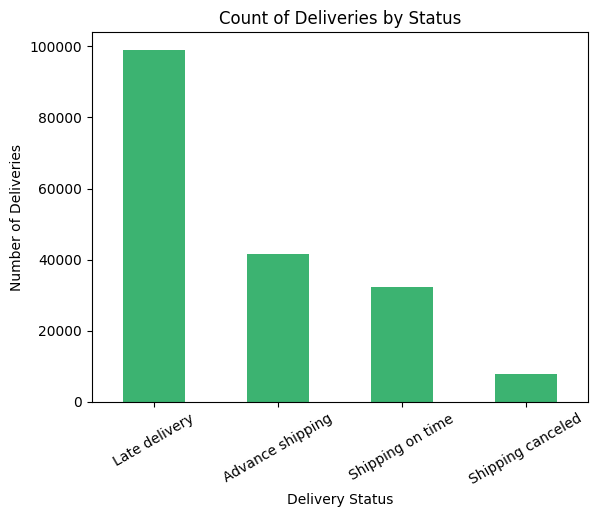

In [ ]:
# Bar Chart: Count of Deliveries by Delivery Status
plt.figure()
delivery_status_counts = cleaned_dataset['Delivery Status'].value_counts()
delivery_status_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Count of Deliveries by Status')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=30)
plt.show()


In [ ]:
# Convert categorical columns to numerical values using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = cleaned_dataset.select_dtypes(include=['object']).columns

In [ ]:
categorical_columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [ ]:
for col in categorical_columns:
    cleaned_dataset[col] = label_encoder.fit_transform(cleaned_dataset[col])
preprocessed_dataset = cleaned_dataset

In [ ]:
preprocessed_dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,3,4,91.250000,314.640015,0,0,73,40,65,...,15,475,2,1360,73,78,327.75,0,3249,3
1,3,5,4,-249.089996,311.359985,1,1,73,40,65,...,13,841,5,1360,73,78,327.75,0,20133,3
2,0,4,4,-247.779999,309.720001,3,0,73,40,451,...,13,841,1,1360,73,78,327.75,0,19904,3
3,1,3,4,22.860001,304.809998,0,0,73,40,284,...,11,835,2,1360,73,78,327.75,0,19676,3
4,2,2,4,134.210007,298.250000,0,0,73,40,65,...,11,835,6,1360,73,78,327.75,0,19452,3


In [ ]:
print(len(preprocessed_dataset))

180508


In [ ]:
from sklearn.model_selection import train_test_split

X = preprocessed_dataset.drop(['Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk'], axis=1)
y = preprocessed_dataset[['Days for shipping (real)','Days for shipment (scheduled)']]


In [ ]:
from sklearn.model_selection import train_test_split
columns_to_drop = [
    "Benefit per order",
    "Sales per customer",
    "Delivery Status",
    "Customer Fname",
    "Customer Lname",
    "Order Item Discount",
    "Order Item Discount Rate",
    "Order Item Profit Ratio",
    "Order Profit Per Order",
    "Order Region",
    "Shipping date (DateOrders)",
    "order date (DateOrders)"
]

X = X.drop(columns=columns_to_drop, errors='ignore')

# Step 1: Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split 10% of the training data for validation (90% of training for actual training)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)




Epoch 1/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: 1.9929 - val_loss: 0.8069
Epoch 2/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 0.8148 - val_loss: 0.8123
Epoch 3/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 0.8116 - val_loss: 0.8200
Epoch 4/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - loss: 0.8102 - val_loss: 0.8029
Epoch 5/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - loss: 0.8074 - val_loss: 0.8117
Epoch 6/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.8070 - val_loss: 0.8058
Epoch 7/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.8075 - val_loss: 0.8047
Epoch 8/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: 0.8064 - val_loss: 0.8045
Epoch 9/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.8047 - val_loss: 0.8115
Epoch 10/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.8109 - val_loss: 0.8037
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MSE: 0.7979446022966957
MAE: 0.512571095125486
R² Score: 0.6955409

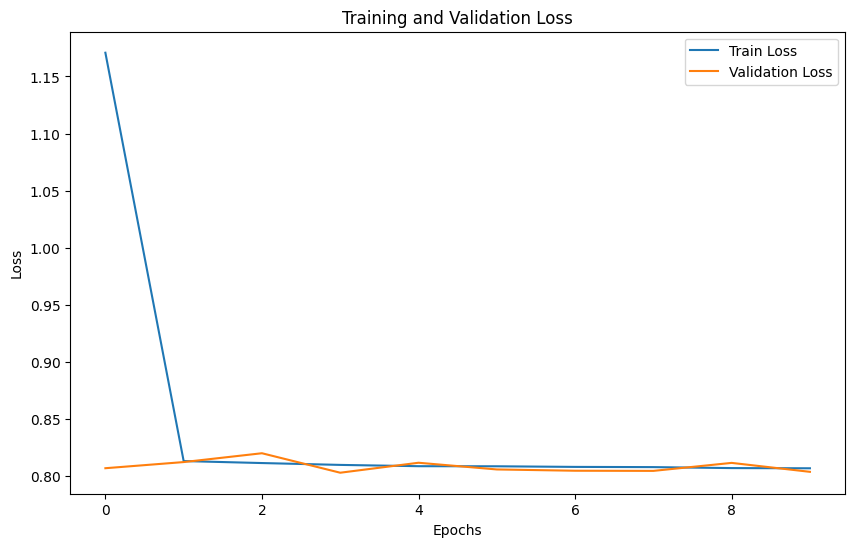

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import History

# Rescale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
X_val_scaled = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

# LSTM model for multi-output regression
lstm_model = Sequential()
# First LSTM layer with return_sequences=True to pass sequences to the next LSTM layer
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))

# Second LSTM layer
lstm_model.add(LSTM(50, activation='relu'))  # Second LSTM layer without return_sequences

# Output layer with 2 neurons (for the 2 target variables)
lstm_model.add(Dense(2))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model with validation data
history = lstm_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

# Predict
y_pred = lstm_model.predict(X_test_scaled)

# Calculate MSE for each output
mse_real = mean_squared_error(y_test.iloc[:, 0], y_pred[:, 0])
mse_scheduled = mean_squared_error(y_test.iloc[:, 1], y_pred[:, 1])

# Calculate combined MSE (average of both MSE values)
mse_combined = (mse_real + mse_scheduled) / 2

# Calculate MAE for each target variable
mae_real = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
mae_scheduled = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

# Calculate combined MAE (average of both MAE values)
mae_combined = (mae_real + mae_scheduled) / 2
r2_combined = r2_score(y_test, y_pred)

# Print the results
print(f'MSE: {mse_combined}')
print(f'MAE: {mae_combined}')
print(f'R² Score: {r2_combined}')

# Plot the training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 1.7619 - val_loss: 0.9520
Epoch 2/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.9539 - val_loss: 0.8860
Epoch 3/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.8575 - val_loss: 0.8061
Epoch 4/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.8090 - val_loss: 0.8049
Epoch 5/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.8115 - val_loss: 0.8170
Epoch 6/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.8072 - val_loss: 0.8109
Epoch 7/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.8085 - val_loss: 0.8072
Epoch 8/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.8111 - val_loss: 0.8127
Epoch 9/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.8078 - val_loss: 0.8044
Epoch 10/10
4062/4062 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.8058 - val_loss: 0.8039
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MSE: 0.7980751372235017
MAE: 0.5024491518848979
R² Score: 0.695541

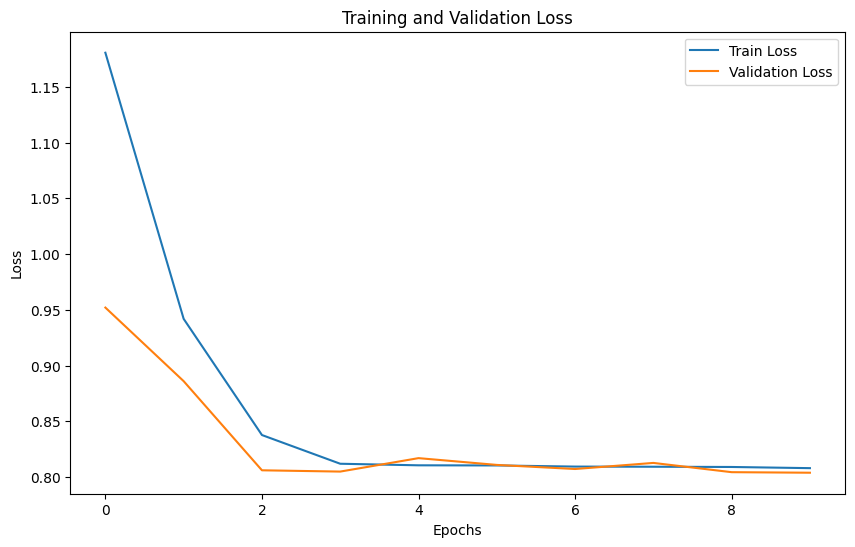

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Rescale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


# Reshape to 3D for GRU input
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
X_val_scaled = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))



# GRU model for multi-output regression
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
gru_model.add(Dense(2))  # Output layer with 2 neurons for the 2 target variables
gru_model.compile(optimizer='adam', loss='mse')

# Train the GRU model with validation data
history = gru_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

# Make predictions
y_pred = gru_model.predict(X_test_scaled)

# Calculate MSE for each output
mse_real = mean_squared_error(y_test.iloc[:, 0], y_pred[:, 0])
mse_scheduled = mean_squared_error(y_test.iloc[:, 1], y_pred[:, 1])

mse_combined = (mse_real + mse_scheduled) / 2

# Calculate MAE for each target variable
mae_real = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
mae_scheduled = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])

# Calculate combined MAE (average of both MAE values)
mae_combined = (mae_real + mae_scheduled) / 2
r2_combined = r2_score(y_test, y_pred)

# Print the results
print(f'MSE: {mse_combined}')
print(f'MAE: {mae_combined}')
print(f'R² Score: {r2_combined}')

# Plot the training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
